In [11]:
import networkx as nx
import matplotlib
%matplotlib inline
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import random
import time

DATAFOLDER='./data'

In [2]:
# # ONLY IF COLAB 
# from google.colab import drive
# from metropolisHastings import DATAFOLDER
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/src/NetworkSyncCapstone
# DATAFOLDER='./data'

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Only if gradient
DATAFOLDER='/storage/data'

In [12]:
import sys
sys.path.append('./Metropolis/')
sys.path.append('./src')

In [14]:
#---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree --- CONTINUOUS II 
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode, TDeleteEdgeAddEdge, TDeleteEdgeAddEdgeWeightedColumnStochastic
from networkSigma import discreteSigma2Analytical,continuousSigma2Analytical
from measuresFunctions import getMeasuresDirected, getMeasuresDirectedContinuous
from pickleUtil import pickleSave, pickleLoad
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [-100000, -100001, -100002, -100003, -100004, -100005, -100006, -100007, -100008, -100009, -100010, -100011, -100012, -100013, -100014, -100015, -100016, -100017, -100018, -100019, -100020, \
    -100021, -100022, -100023, -100024, -100025, -100026, -100027, -100028, -100029]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=2  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
N=100
din = fixedDegreeSequence(N, expected_din)
dout = randomDegreeSequence(N, N*expected_din)

Gstart = getDirectedConfigurationModel(din, dout, withSelfLoops=False, return_graph = True)
Gstart = flattenIncomingDegree(Gstart, expected_din )
Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same

# result_beta = pickleLoad('FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100009', f'{DATAFOLDER}')
# Gstart = result_beta['lastnet']

# SELECT TRANSFORMATION
# ---------------------------------
T = TDeleteEdgeAddEdgeWeightedColumnStochastic

pickleSave(Gstart, f'FixIn-{N}-DegIn{expected_din}-{T.__name__}-NoSelf-FixedW-Continuous-MIN-001-StartNet', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)



# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=5, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=continuousSigma2Analytical, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            picklename=f'FixIn-{N}-DegIn{expected_din}-{T.__name__}-NoSelf-FixedW-Continuous-MIN-001',
            sample_measure_fn=getMeasuresDirectedContinuous,   #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            burnin = 100, 
            max_propositions=5000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/FixIn-{N}-DegIn{expected_din}-{T.__name__}-NoSelf-FixedW-Continuous-MIN-001_lastnet_C.npy', C)


ImportError: cannot import name 'TDeleteEdgeAddEdgeWeightedColumnStochastic' from 'markovTransforms' (/home/jovyan/notebooks/NetworkSyncCapstone/markovTransforms.py)

In [5]:
#---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode
from networkSigma import discreteSigma2Analytical
from measuresFunctions import getMeasuresDirected
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [-5000, -2500, -2000, -1500,  -1000, -500, 0,  250, 500, 1000, 2000, 5000]

n=100
p=0.05

# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=3  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
N=100
din = fixedDegreeSequence(N, expected_din)
dout = randomDegreeSequence(N, N*expected_din)

Gstart = getDirectedConfigurationModel(din, dout, withSelfLoops=False, return_graph = True)
Gstart = flattenIncomingDegree(Gstart, expected_din )
Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same

G = copy.deepcopy(Gstart)

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNode

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=50, 
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=discreteSigma2Analytical, 
            picklename=f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW', 
            sample_measure_fn=getMeasuresDirected,
            max_propositions=5000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/ER-{n}-p{p}-InDegree-NoSelf-RandomW_lastnet_C.npy', C)

Number of samples requested:  50
Number of accepted swaps between samples: 151
5000 burning iterations at the start before taking any samples
Sample taken at time 10000 with discreteSigma2Analytical =  1.2785 after 2826 accepted swaps (target accepted swaps before sampling = 5000).


AttributeError: ignored

In [8]:
#---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree
# RELOAD FROM BETA AS STARTING NETWORK
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode
from networkSigma import discreteSigma2Analytical
from measuresFunctions import getMeasuresDirected
from pickleUtil import pickleLoad, pickleSave
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

original_betas = [-5000, -2500, -2000, -1500,  -1000, -500, 0,  250, 500, 1000, 2000, 5000]
betas = [300, 500, 600]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# RELOAD FROM BETA
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=2  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

N=100

result_beta = pickleLoad('r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_0', '.')
Gstart = result_beta['lastnet']
pickleSave(Gstart, f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW_startnet@endBeta0', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNode

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=10,  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=discreteSigma2Analytical, 
            picklename=f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW', 
            sample_measure_fn=getMeasuresDirected,
            max_propositions=5000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW_lastnet_C.npy', C)

Loading object r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_0 from pickle file ./r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_0.pkl
Saving object FixIn-100-DegIn2-InDegree-NoSelf-FixedW_startnet@endBeta0 to pickle file ./data/FixIn-100-DegIn2-InDegree-NoSelf-FixedW_startnet@endBeta0.pkl
Number of samples requested:  10
Number of accepted swaps between samples: 101
5000 burning iterations at the start before taking any samples
Sample taken at time 23188 with discreteSigma2Analytical =  2223.9128 after 5000 accepted swaps (target accepted swaps before sampling = 5000).
# Rejected: 18188
# Accepted: 5000
Proportion rejected: 0.7843712264964637
Saving object FixIn-100-DegIn2-InDegree-NoSelf-FixedW_burnin_300 to pickle file ./data/FixIn-100-DegIn2-InDegree-NoSelf-FixedW_burnin_300.pkl
--------------------------------------------------------------
                    Beta =  300
--------------------------------------------------------------
Sample taken at time 825 with discreteSig

In [10]:
  #---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree
# RELOAD FROM BETA AS STARTING NETWORK
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode
from networkSigma import discreteSigma2Analytical
from measuresFunctions import getMeasuresDirected
from pickleUtil import pickleLoad, pickleSave
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009, 100010, 100011, 100012, 100013, 100014, 100015, 100016, 100017, 100018, 100019 ]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# RELOAD FROM BETA
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=2  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

N=100

result_beta = pickleLoad('r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW-Continuous-003_up_beta_100000', f'{DATAFOLDER}')
Gstart = result_beta['lastnet']
pickleSave(Gstart, f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-004_StartNet@Beta100000', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNode

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=1,  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=discreteSigma2Analytical, 
            picklename=f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-004', 
            sample_measure_fn=getMeasuresDirected,
            max_propositions=5000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-004_lastnet_C.npy', C)

NameError: name 'DATAFOLDER' is not defined

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree --- CONTINUOUS
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode
from networkSigma import discreteSigma2Analytical,continuousSigma2Analytical
from measuresFunctions import getMeasuresDirected, getMeasuresDirectedContinuous
from pickleUtil import pickleSave, pickleLoad
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [ 100010, 100011, 100012, 100013, 100014, 100015, 100016, 100017, 100018, 100019, 100020  ]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=3  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
N=100
# din = fixedDegreeSequence(N, expected_din)
# dout = randomDegreeSequence(N, N*expected_din)

# Gstart = getDirectedConfigurationModel(din, dout, withSelfLoops=False, return_graph = True)
# Gstart = flattenIncomingDegree(Gstart, expected_din )
# Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same

result_beta = pickleLoad('FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_up_beta_100009', f'{DATAFOLDER}')
Gstart = result_beta['lastnet']

pickleSave(Gstart, f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-MAX-003-StartNet@100009', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNode

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=3, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=continuousSigma2Analytical, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            picklename=f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-MAX-003',
            sample_measure_fn=getMeasuresDirectedContinuous,   #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            burnin = 1, 
            max_propositions=5000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-MAX-003_lastnet_C.npy', C)

Loading object FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_up_beta_100009 from pickle file ./data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_up_beta_100009.pkl
Saving object FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003-StartNet@100009 to pickle file ./data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003-StartNet@100009.pkl
Number of samples requested:  3
Number of accepted swaps between samples: 151
1 burning iterations at the start before taking any samples
Sample taken at time 60 with continuousSigma2Analytical =  729.6560 after 1 accepted swaps (target accepted swaps before sampling = 1).
# Rejected: 59
# Accepted: 1
Proportion rejected: 0.9833333333333333
Saving object FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003_burnin_100010 to pickle file ./data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003_burnin_100010.pkl
--------------------------------------------------------------
                    Beta =  100010


KeyboardInterrupt: 

In [ ]:
result_beta = pickleLoad('r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_0', '.')
result_beta

Loading object r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_0 from pickle file ./r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_0.pkl


{'samples': {'N': [100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100,
   100],
  'L': [200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200,
   200],
  'average_degree': [4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,
   4.0,

In [ ]:
import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta, loadFromPickle
from markovTransforms import TReconnectOriginOfEdgeToOtherNode
from networkSigma import discreteSigma2Analytical
from measuresFunctions import getMeasuresDirected
from networkGenerator import getDirectedColumnStochasticErdosRenyi

betas = [-200, -100, 0, 100, 300, 600, 800, 1000, 1200, 1400]
plotMetropolisHastingsResult(result, measurename=discreteSigma2Analytical.__name__, betas=betas)

TypeError: string indices must be integers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


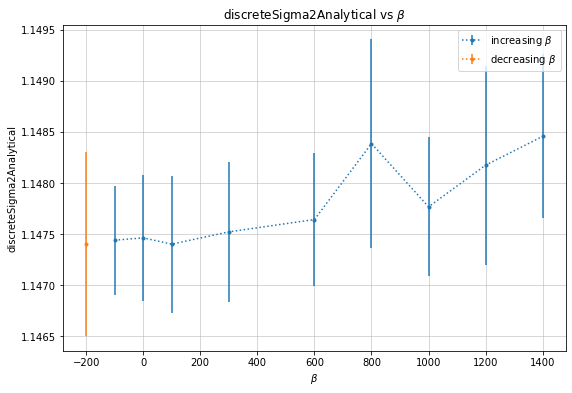

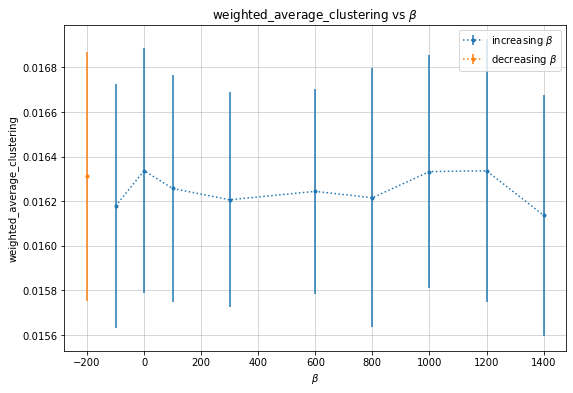

In [ ]:
#-------------------------------------------------------------------
# Analyse 'r_ER-100-p0.1-InDegree-NoSelf-RandomW'
#--------------------------------------------------------------------

from metropolisHastings import loadFromPickle

pickleroot = '{DATAFOLDER}/r_ER-100-p0.1-InDegree-NoSelf-RandomW'

result = loadFromPickle(pickleroot=pickleroot, measurenames=['discreteSigma2Analytical','weighted_average_clustering'], gml=False, errorbar=True, title=None, figsize=None)

    # name like r_Gcatu_TSE_up_beta_3000.pkl
    #     E.G. PICKLEROOT='r_Gcatu_TSE_'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


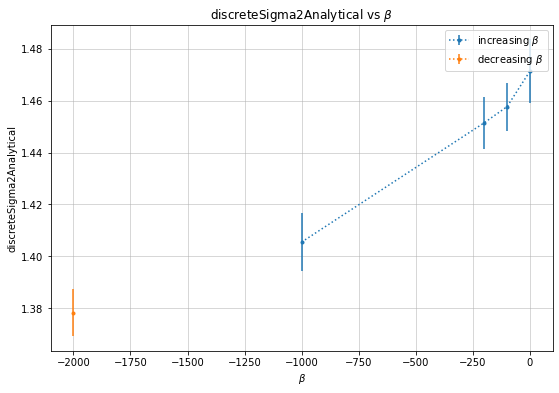

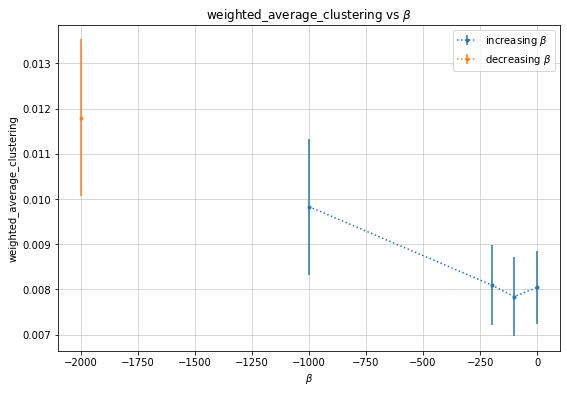

In [ ]:
#-------------------------------------------------------------------
# Analyse 'r_ER-100-p0.1-InDegree-NoSelf-RandomW'
#--------------------------------------------------------------------

from metropolisHastings import loadFromPickle

pickleroot = f'{DATAFOLDER}/r_ER-100-p0.05-InDegree-NoSelf-RandomW'

result = loadFromPickle(pickleroot=pickleroot, measurenames=['discreteSigma2Analytical','weighted_average_clustering'], gml=False, errorbar=True, title=None, figsize=None)

    # name like r_Gcatu_TSE_up_beta_3000.pkl
    #     E.G. PICKLEROOT='r_Gcatu_TSE_'

In [ ]:

import numpy as np
C = np.array([[0.2,0], [0, 0.2]])
checkValue = lambda x: (x == 0.2 or x == 0)

def checkVal2(x):
    if (x == 0.2 or x == 0):
        return True
    return False
checkVal2(C)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

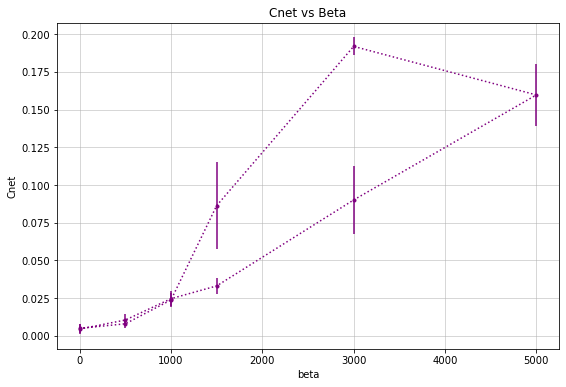

In [ ]:
      
plotMetropolisHastingsResult(result, 'Cnet', beta)


In [ ]:
# for i, b in enumerate(beta):
#     nx.draw_networkx(result[i]['lastnet'])
#     plt.show()

In [ ]:
# K-regular 
#  The ensemble G corresponds to k-regular undirected networks with N = 640 and degree k = 4. The observable is the clustering coefficient s = c

beta = [-100, 0, 100, 300,  500, 800, 1000, 1500]

Gstart = nx.random_regular_graph(4, 100)

tic = time.perf_counter()

result=iterMHBeta(5, beta,  Gstart.number_of_edges()/2, Gstart, TSwapEdges, 'resultKRegular_4_100', 2000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

plotMetropolisHastingsResult(result, 'Cnet', beta)

Number of samples requested:  5
Number of accepted swaps between samples: 101
--------------------------------------------------------------
                    Beta =  -100
--------------------------------------------------------------
Sample taken at time 106 with Cnet =  0.0200 after 101 accepted swaps (target accepted swaps before sampling = 101).
Sample taken at time 212 with Cnet =  0.0150 after 101 accepted swaps (target accepted swaps before sampling = 101).
Sample taken at time 317 with Cnet =  0.0250 after 101 accepted swaps (target accepted swaps before sampling = 101).
Sample taken at time 422 with Cnet =  0.0050 after 101 accepted swaps (target accepted swaps before sampling = 101).
Sample taken at time 530 with Cnet =  0.0150 after 101 accepted swaps (target accepted swaps before sampling = 101).
# Rejected: 25
# Accepted: 505
Proportion rejected: 0.04716981132075472
Number of nodes N:              100.0000  +/-  0.0000
Number of links L:              200.0000  +/-  0.000

KeyboardInterrupt: 

In [ ]:
pickleSave(result, 'resultKRegular_4_100', '.' )

Number of samples requested:  15
Number of accepted swaps between samples: 161
--------------------------------------------------------------
                    Beta =  0
--------------------------------------------------------------
Sample taken at time 161 with Cnet =  0.0219 after 161 accepted swaps (target accepted swaps before sampling = 161).
Sample taken at time 322 with Cnet =  0.0187 after 161 accepted swaps (target accepted swaps before sampling = 161).
Sample taken at time 483 with Cnet =  0.0219 after 161 accepted swaps (target accepted swaps before sampling = 161).
Sample taken at time 644 with Cnet =  0.0063 after 161 accepted swaps (target accepted swaps before sampling = 161).
Sample taken at time 805 with Cnet =  0.0156 after 161 accepted swaps (target accepted swaps before sampling = 161).
Sample taken at time 966 with Cnet =  0.0219 after 161 accepted swaps (target accepted swaps before sampling = 161).
Sample taken at time 1127 with Cnet =  0.0156 after 161 accepte

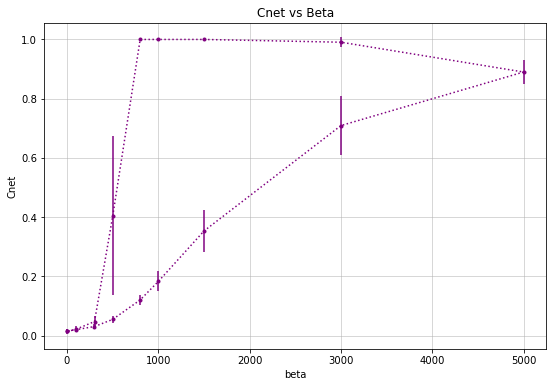

In [ ]:
# K-regular 
#  The ensemble G corresponds to k-regular undirected networks with N = 640 and degree k = 4. The observable is the clustering coefficient s = c

beta = [0, 100, 300,  500, 800, 1000, 1500, 3000,  5000, 3001, 1501, 1001, 801, 501, 301, 101, 1]

Gstart = nx.random_regular_graph(4, 160)

tic = time.perf_counter()
number_of_samples=15

result=iterMHBeta(number_of_samples, beta,  Gstart.number_of_edges()/2, Gstart, TSwapEdges, 'resultKRegular_4_160', 10000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

plotMetropolisHastingsResult(result, 'Cnet', beta)

picklename='20210515_10000_resultKRegular_4_160_'
pickleSave(beta, picklename + 'beta_', '.')
pickleSave(result, '20210515_10000_resultKRegular_4_160_', '.' )

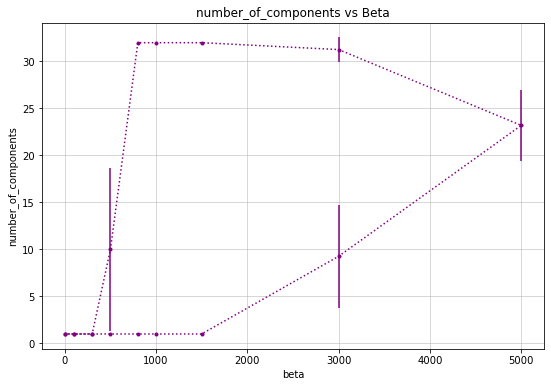

In [ ]:
plotMetropolisHastingsResult(result, 'number_of_components', beta)

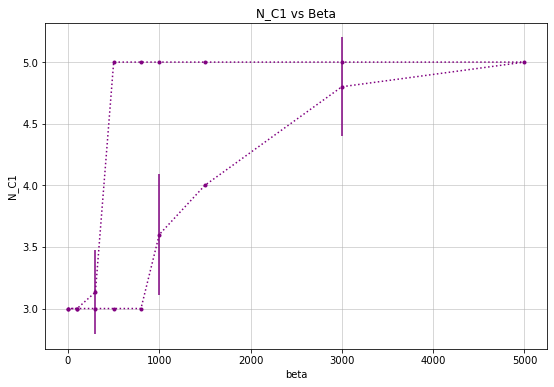

In [ ]:
plotMetropolisHastingsResult(result, 'N_C1', beta)  #size largest clique

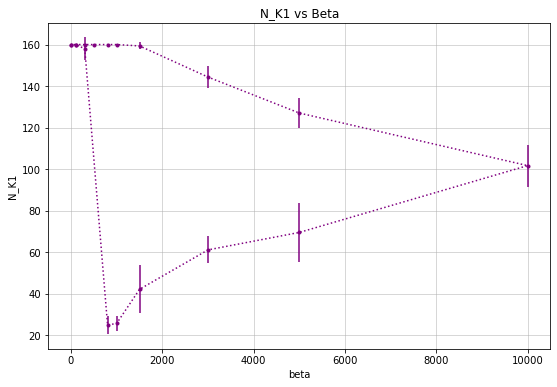

In [ ]:
plotMetropolisHastingsResult(result, 'N_K1', beta)  #size largest component

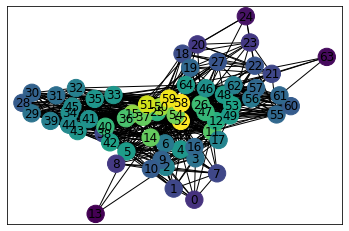

In [ ]:
# brain cat

from sampleNetworks import getGcatu
from measuresFunctions import plotDegreeDistribution


beta = [0, 100, 300,  500, 800, 1000, 1500, 3000,  5000, 3001, 1501, 1001, 801, 501, 301, 101, 1]

Gstart = getGcatu()

nx.draw_networkx(Gstart, node_color=[d for v, d in Gstart.degree()])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

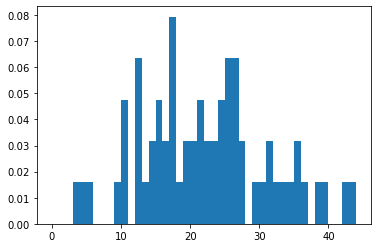

In [ ]:
plotDegreeDistribution(Gstart)

Number of samples requested:  20
Number of accepted swaps between samples: 366
--------------------------------------------------------------
                    Beta =  0
--------------------------------------------------------------
Sample taken at time 366 with Cnet =  0.4731 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 732 with Cnet =  0.4705 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 1098 with Cnet =  0.4575 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 1464 with Cnet =  0.4666 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 1830 with Cnet =  0.4605 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 2196 with Cnet =  0.4602 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 2562 with Cnet =  0.4653 after 366 acc

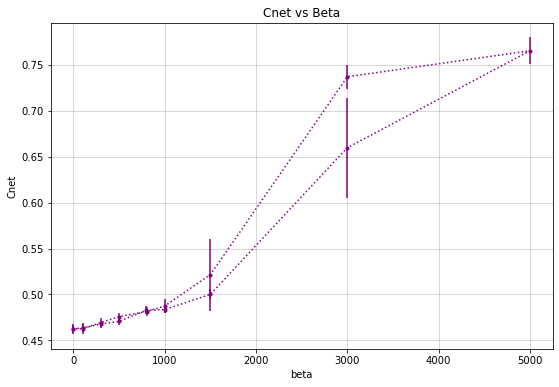

In [ ]:
tic = time.perf_counter()
number_of_samples=20

result=iterMHBeta(number_of_samples, beta,  Gstart.number_of_edges()/2, Gstart, TSwapEdges, 'resultKRegular_4_160', 10000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

plotMetropolisHastingsResult(result, 'Cnet', beta)

picklename='20210515_10000_resultgCatu_'
pickleSave(beta, picklename + 'beta_', '.')
pickleSave(result, '20210515_10000_resultGcatu_', '.' )

Number of samples requested:  1000
Number of accepted swaps between samples: 366
5000 burning iterations at the start before taking any samples
Sample taken at time 5000 with Cnet =  0.4661 after 5000 accepted swaps (target accepted swaps before sampling = 5000).
# Rejected: 0
# Accepted: 5000
Proportion rejected: 0.0
Gcatu_TSE_density_burnin_0 saved as pkl file in Gcatu_TSE_density_burnin_0.pkl
--------------------------------------------------------------
                    Beta =  0
--------------------------------------------------------------
Sample taken at time 366 with Cnet =  0.4602 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 732 with Cnet =  0.4642 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 1098 with Cnet =  0.4565 after 366 accepted swaps (target accepted swaps before sampling = 366).
Sample taken at time 1464 with Cnet =  0.4569 after 366 accepted swaps (target accepted swaps

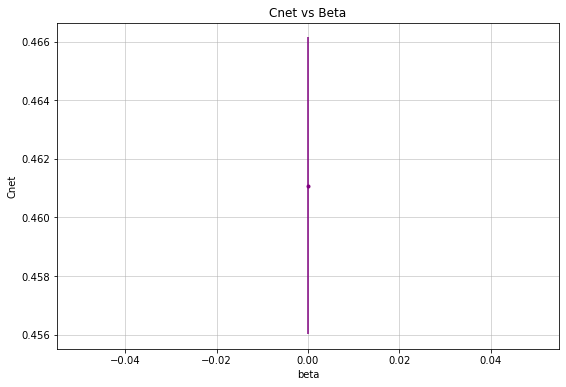

In [ ]:
#-------------------
# SELECT START NETWORK

from sampleNetworks import getGcatu

Gstart=getGcatu()
# Select same transformation as network you want to calculate state density for 
T=TSwapEdges
#choose pickle name
picklename='Gcatu_TSE_density'

#--------------------------------
# do a long run for Beta = 0 only
#---------------------------------
beta=[0]
number_of_samples=1000

# run the rest as usual

tic = time.perf_counter()

thinning=Gstart.number_of_edges()/2
maxiteration=thinning*10



result=iterMHBeta(number_of_samples, beta,  thinning, Gstart, T, picklename, maxiteration)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

plotMetropolisHastingsResult(result, 'Cnet', beta)

pickleSave(beta, 'beta_' + picklename, '.')
pickleSave(result, 'result_' + picklename, '.' )


In [ ]:
#-------------------
# SELECT START NETWORK

from sampleNetworks import getGcatu

Gstart=getGcatu()
# Select same transformation as network you want to calculate state density for 
T=TSwapEdges
#choose pickle name
picklename='Gcatu_TSE_density'

#--------------------------------
# do a long run for Beta = 0 only
#---------------------------------
beta=[0]
number_of_samples=1000

# run the rest as usual

tic = time.perf_counter()

thinning=Gstart.number_of_edges()/2
maxiteration=thinning*10



result=iterMHBeta(number_of_samples, beta,  thinning, Gstart, T, picklename, maxiteration)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

plotMetropolisHastingsResult(result, 'Cnet', beta)

pickleSave(beta, 'beta_' + picklename, '.')
pickleSave(result, 'result_' + picklename, '.' )

In [ ]:
import pickle
def pickleSave(object, name, folder='.'):

    filename = folder + '/' + name + '.pkl'
    print('Saving object {} to pickle file {}'.format(name, filename))
    with open(filename, mode='wb') as fipkl:    
        pickle.dump(object, fipkl)
        
def pickleLoad(name, folder: str):
    
    filename = folder + '/' + name + '.pkl'
    print('Loading object {} from pickle file {}'.format(name, filename))
    
    try:
        with open(filename, mode='rb') as fipkl:
            myObject=pickle.load(fipkl)
        return myObject
    except IOError:
        print('Pickle file {} not found, returning None object'.format(filename))
        return None

Loading object r_KRegular_4_300_TDA_up_beta_5250 from pickle file ./r_KRegular_4_300_TDA_up_beta_5250.pkl


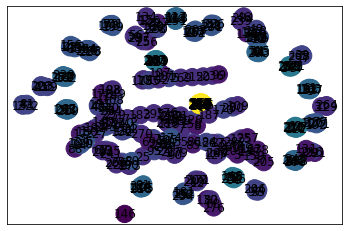

In [ ]:
#---------------------------
# reading about
#------------------------------

resultk5700up=pickleLoad('r_KRegular_4_300_TDA_up_beta_5250', '.')

g=resultk5700up['lastnet']

pos = nx.spring_layout(g)
nx.draw_networkx(g, node_color=[d for v, d in g.degree()], pos=pos)

m=getMeasures(g)

In [ ]:
printMeasures(m)

Number of nodes N:              300
Number of links L:              600
Average node degree <z>:        4.0000
Deviation of degree sigma_z:    2.9710
Degree variability sigma_z/<z>: 0.7427
Number of components:           53
Size of largest component:      17
Size of largest clique:         16
Distances are measured on the largest component:
Diameter :                      11.0000
<<d>>:                          4.6471
For multigraph Cnet and <C> is measured after transforming the graph into a simple graph
Multigraph: 1 - Yes, 0 - No     0
Cnet:                           0.9709
<C>:                            0.7494


In [ ]:
nx.write_edgelist(g, "r_KRegular_4_300_TDA_up_beta_5750.gz", data=False)

In [ ]:
nx.write_gml(g, "r_KRegular_4_300_TDA_up_beta_5250.gml")

Loading object r_KRegular_4_300_TDA_down_beta_4000 from pickle file ./r_KRegular_4_300_TDA_down_beta_4000.pkl
Number of nodes N:              300
Number of links L:              600
Average node degree <z>:        4.0000
Deviation of degree sigma_z:    3.0056
Degree variability sigma_z/<z>: 0.7514
Number of components:           20
Size of largest component:      196
Size of largest clique:         16
Distances are measured on the largest component:
Diameter :                      27.0000
<<d>>:                          10.3658
For multigraph Cnet and <C> is measured after transforming the graph into a simple graph
Multigraph: 1 - Yes, 0 - No     0
Cnet:                           0.8948
<C>:                            0.5000


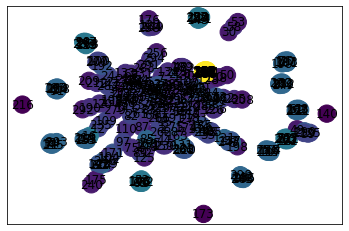

In [ ]:
#---------------------------
# reading about
#------------------------------
from pickleUtil import pickleLoad
from measuresFunctions import getMeasures, printMeasures
import networkx as nx

result=pickleLoad('r_KRegular_4_300_TDA_down_beta_4000', '.')

g=result['lastnet']

pos = nx.spring_layout(g)
nx.draw_networkx(g, node_color=[d for v, d in g.degree()], pos=pos)

m=getMeasures(g)
printMeasures(m)

In [ ]:
nx.write_gml(g, "r_KRegular_4_300_TDA_down_beta_4000.gml")

In [ ]:
#------------------------------
# STUDIED NETWORKS
#-----------------------------
from sampleNetworks import getGcatu
from measuresFunctions import getMeasures, printMeasures
import networkx as nx

gcatu=getGcatu()
m=getMeasures(gcatu)
printMeasures(m)
connectance=22.4615/64
print(connectance)
# gword=nx.read_gml('adjnoun.gml')
# mw=getMeasures(gword)
# printMeasures(mw)
# gfoot=nx.read_gml('football.gml')
# mf=getMeasures(gfoot)
# printMeasures(mf)

Number of nodes N:              65
Number of links L:              730
Average node degree <z>:        22.4615
Deviation of degree sigma_z:    9.9105
Degree variability sigma_z/<z>: 0.4412
Number of components:           1
Size of largest component:      65
Size of largest clique:         12
Distances are measured on the largest component:
Diameter :                      3.0000
<<d>>:                          1.6995
For multigraph Cnet and <C> is measured after transforming the graph into a simple graph
Multigraph: 1 - Yes, 0 - No     0
Cnet:                           0.5747
<C>:                            0.6614
0.3509609375


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotDegreeDistribution(g, title):
    deg_sequence =  [d for v, d in g.degree()]
    fig, ax = plt.subplots()
    plt.hist(deg_sequence,density=True,bins=range(np.max(deg_sequence)), histtype='bar')
    plt.title(title)
    return fig, ax
# plotDegreeDistribution(gword, 'Word adjacency Degree Distribution')
# plotDegreeDistribution(gfoot, 'College Football Network Degree Distribution')
# plotDegreeDistribution(gcatu, 'Cat\'s connectome Degree Distribution')

In [ ]:
name='r_KRegular_4_300_TDA_down_beta_1400.gml'
g=nx.read_gml(name)
m=getMeasures(g)
printMeasures(m)
plotDegreeDistribution(g, '{} Degree Distribution'.format(name))

Number of nodes N:              300
Number of links L:              600
Average node degree <z>:        4.0000
Deviation of degree sigma_z:    2.9978
Degree variability sigma_z/<z>: 0.7494
Number of components:           2
Size of largest component:      299
Size of largest clique:         16
Distances are measured on the largest component:
Diameter :                      10.0000
<<d>>:                          5.0558
For multigraph Cnet and <C> is measured after transforming the graph into a simple graph
Multigraph: 1 - Yes, 0 - No     0
Cnet:                           0.5413
<C>:                            0.0658


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'r_KRegular_4_300_TDA_down_beta_1400.gml Degree Distribution'}>)

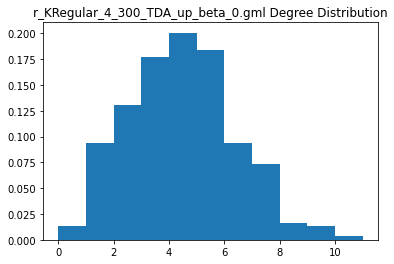

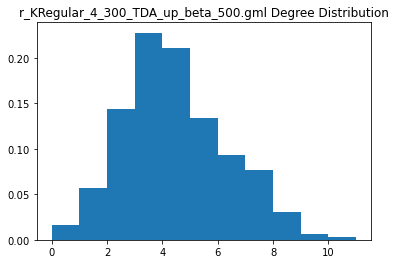

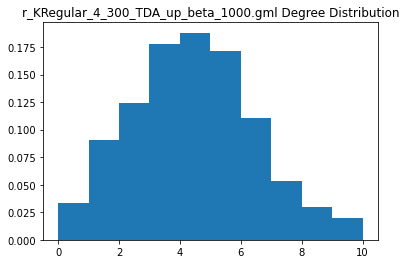

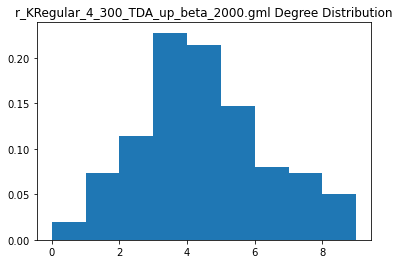

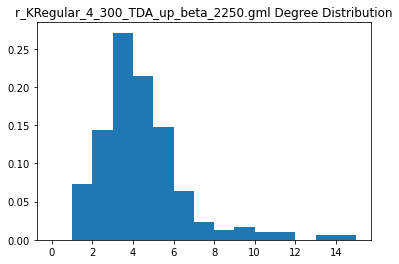

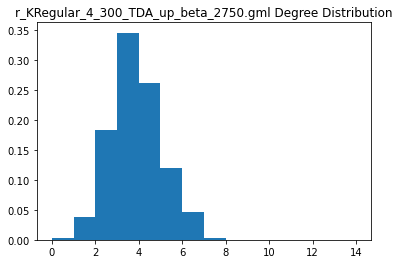

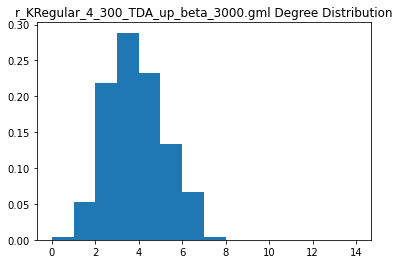

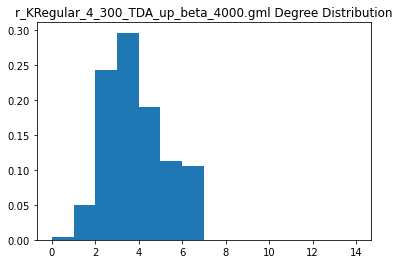

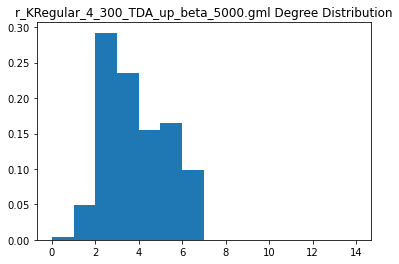

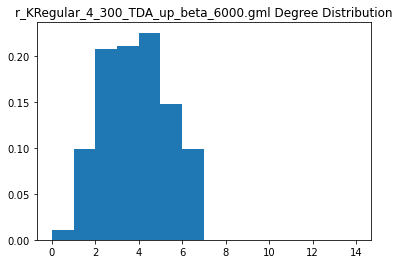

In [ ]:
#-------------------------
# Loading a few K-reg Single Edge Swap
#--------------------------------
names=['r_KRegular_4_300_TDA_up_beta_0.gml', 'r_KRegular_4_300_TDA_up_beta_500.gml', 'r_KRegular_4_300_TDA_up_beta_1000.gml',
       'r_KRegular_4_300_TDA_up_beta_2000.gml', 'r_KRegular_4_300_TDA_up_beta_2250.gml', 'r_KRegular_4_300_TDA_up_beta_2750.gml',
      'r_KRegular_4_300_TDA_up_beta_3000.gml','r_KRegular_4_300_TDA_up_beta_4000.gml','r_KRegular_4_300_TDA_up_beta_5000.gml',
      'r_KRegular_4_300_TDA_up_beta_6000.gml']

for name in names:
    g=nx.read_gml(name)
    plotDegreeDistribution(g, '{} Degree Distribution'.format(name))


In [ ]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

def loglogDeg(Gorig, title):
    # G = some networkx graph

    G=nx.convert_node_labels_to_integers(Gorig, first_label=0, ordering='default')
    degrees = [ d for n,d in G.degree() ]

    degree_counts = Counter(degrees)

    x, y = zip(*degree_counts.items())      

    plt.figure(1)   

    # prep axes                                                                                                                      
    plt.xlabel('degree')                                                                                                             
    plt.xscale('log')                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale('log')                                                                                                                
    plt.ylim(1, max(y))    
    plt.title(title)
                                                                                                                                         # do plot                                                                                                                        
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()
    
loglogDeg(gword, 'Word Adjacency LogLog Degree Distribution')    
loglogDeg(gfoot, 'College Football Network LogLog Degree Distribution')    
loglogDeg(gcatu, 'Cat\'s Connectome LogLog Degree Distribution')    

NameError: name 'gword' is not defined

In [ ]:
!pip install powerlaw


  Created wheel for powerlaw: filename=powerlaw-1.4.6-py3-none-any.whl size=24787 sha256=6c8e2521eceeb23b8d621f425d741f3ae52f389a982549ec29c4801630df9e46
  Stored in directory: /home/jovyan/.cache/pip/wheels/ec/b1/00/a4280edbc4e4e22d11f1cbdb82341f882d19dbf54771fafafa
Successfully built powerlaw


In [ ]:
import powerlaw
G=getGcatu()
data = [ d for n,d in G.degree() if d != 0]
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R)
print(p)

4.708129038415526
23.0
-1.2302402652174655
0.3135445618462216


Calculating best minimal value for power law fit


(0.8937616018933021, 2.9999999999999996, 42.17980963514796)


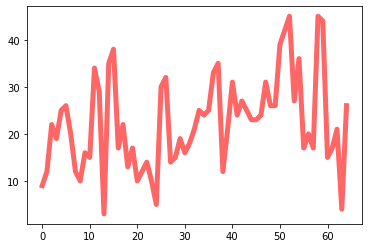

In [ ]:
from scipy.stats import powerlaw
import matplotlib.pyplot as plt

fita  = powerlaw.fit(data)
print(fita)

fig, ax = plt.subplots(1, 1)
a=fita[0]
loc=fita[1]
scale=fita[2]
ax.plot(data,
       'r-', lw=5, alpha=0.6, label='powerlaw pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


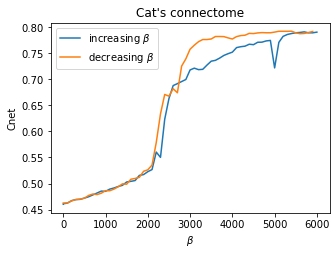

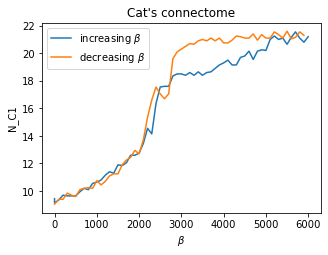

In [ ]:
from metropolisHastings import loadFromPickle
Gcatu_TSE=loadFromPickle('r_Gcatu_TSE_', ['Cnet',  'N_C1'], gml=False, errorbar=False, title='Cat\'s connectome', figsize=(5,3.5))   #N_C1 = size largest clique

In [ ]:
nx.write_gml(g, "gCatu.gml")

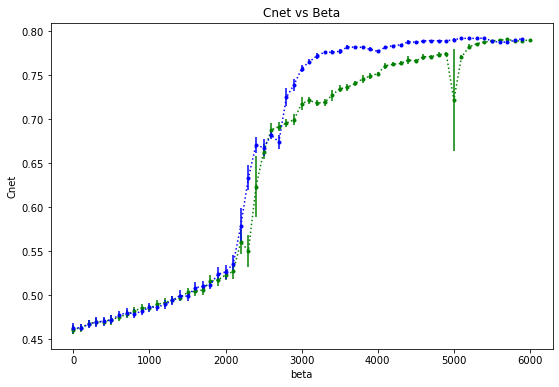

In [ ]:
#-----------------------------
# STITCH RUNS TOGETHER
#-----------------------------
from pathlib import Path
from metropolisHastings import plotMetropolisHastingsResult
from pickleUtil import pickleLoad
import matplotlib.pyplot as plt
import pandas as pd
import re

# name like r_Gcatu_TSE_up_beta_3000.pkl

PICKLEROOT='r_Gcatu_TSE_'
baseUri=Path('.')

pklFiles=[x for x in baseUri.glob('**/' + PICKLEROOT + '*.pkl')]

patternBeta = r"beta_([0-9]*)\.pkl"
patternUp = r"_up_"

dataUp={ 'betas': [], 'up': [], 'results': []}
dataDown={ 'betas': [], 'up': [], 'results': []}

for i, fn in enumerate(pklFiles):
    
    beta=int(re.search(patternBeta, fn.name).group(1))
    
    up=False
    if re.search(patternUp, fn.name)!= None:
        up=True
    else:
        up=False
        
        
    #loading pickle file
    result=pickleLoad(str(fn.stem), str(fn.parents[0]), silent=True)
    

        
    if (up):
        dataUp['betas'].append(beta)
        dataUp['up'].append(up)
        dataUp['results'].append(result)
    else:
        dataDown['betas'].append(beta)
        dataDown['up'].append(up)
        dataDown['results'].append(result)
        

df = pd.DataFrame(dataUp)
df = df.sort_values(by='betas')

dfd = pd.DataFrame(dataDown)
dfd = dfd.sort_values(by='betas')
        
fig, axs = plt.subplots(1,1, figsize=(9,6))
plotMetropolisHastingsResult(df['results'], 'Cnet', df['betas'], graph=(fig, axs), col='green')
plotMetropolisHastingsResult(dfd['results'], 'Cnet', dfd['betas'], graph=(fig, axs), col='blue')
        
    
    



In [ ]:
import pandas as pd

df = pd.DataFrame(dataUp)
df = df.sort_values(by='betas')

dfd = pd.DataFrame(dataDown)
dfd = dfd.sort_values(by='betas')

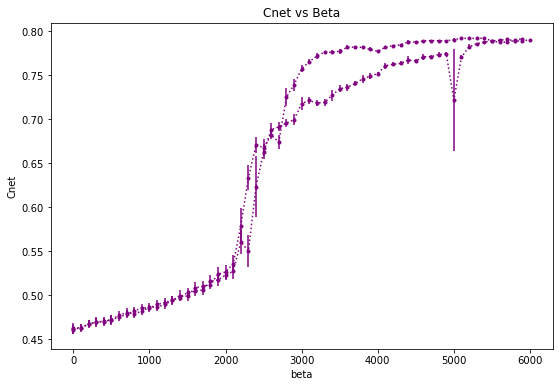

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,1, figsize=(9,6))
plotMetropolisHastingsResult(df['results'], 'Cnet', df['betas'], graph=(fig, axs))
plotMetropolisHastingsResult(dfd['results'], 'Cnet', dfd['betas'], graph=(fig, axs))

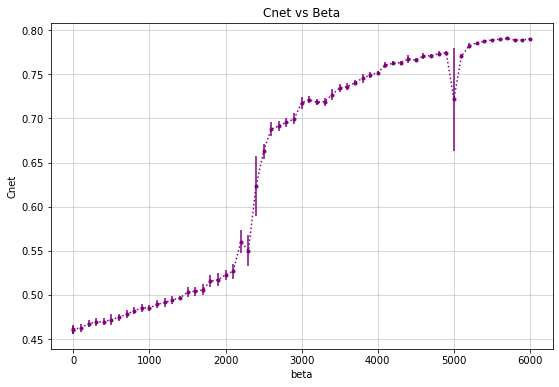

In [ ]:
plotMetropolisHastingsResult(df['results'], 'Cnet', df['betas'], graph=None)
        

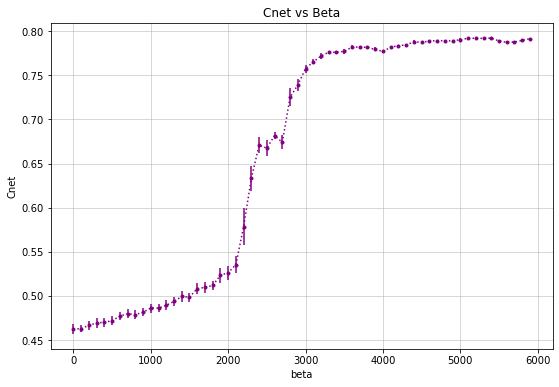

In [ ]:
plotMetropolisHastingsResult(dfd['results'], 'Cnet', dfd['betas'], graph=None)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


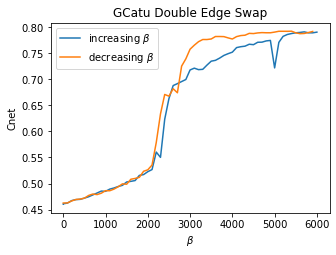

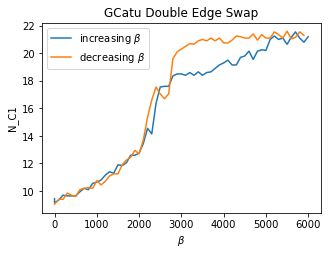

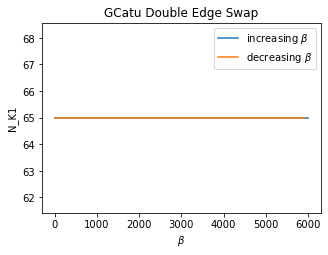

In [ ]:
from metropolisHastings import loadFromPickle
Gcatu_TSE=loadFromPickle('r_Gcatu_TSE_', ['Cnet',  'N_C1', 'N_K1'], gml=False, errorbar=False, title='GCatu Double Edge Swap', figsize=(5,3.5))   #N_C1 = size largest clique

In [ ]:
print('{:03}'.format(1))

001


In [ ]:
%matplotlib widget
from metropolisHastings import loadFromPickle
KReg_Single=loadFromPickle('r_KRegular_4_300_TDA', ['Cnet',  'N_C1', 'N_K1'], gml=True, errorbar=False, title='4-Regular Edge Add/Delete', figsize=(5,3.5))   #N_C1 = size largest clique


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [ ]:
%matplotlib inline
fig, axs=KReg_Single['figax'][1]

axs.plot([2500, 2500], [0,16])
fig.show()

In [ ]:
from sampleNetworks import getGcatu
from measuresFunctions import plotDegreeDistribution
g=getGcatu()



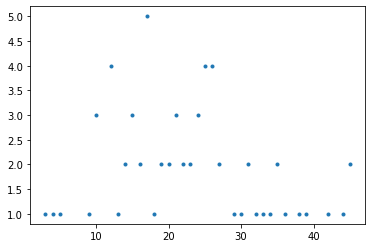

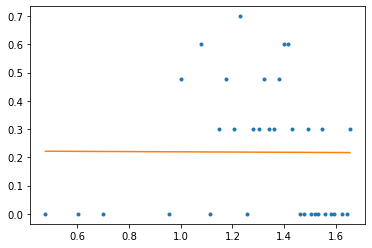

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

k = []
Pk = []
logk = []
logPk = []
N=200
M=2
#G = nx.barabasi_albert_graph(N,M, seed = 42)
G=g

for node in list(G.nodes()):
    degree = G.degree(nbunch=node)
    try:
        pos = k.index(degree)
    except ValueError as e:
        k.append(degree)
        Pk.append(1)
    else:
        Pk[pos] += 1

# get a double log representation
for i in range(len(k)):
    logk.append(math.log10(k[i]))
    logPk.append(math.log10(Pk[i]))

order = np.argsort(logk)
logk_array = np.array(logk)[order]
logPk_array = np.array(logPk)[order]
plt.plot(k,Pk,".")
plt.show()
plt.plot(logk_array, logPk_array, ".")
m, c = np.polyfit(logk_array, logPk_array, 1)
plt.plot(logk_array, m*logk_array + c, "-")